In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import bs4 as bs
import pandas as pd
from urllib.request import Request, urlopen

df_list = []
r_values = ['210008','200061','190075','180084','170099','160058','150059','140052','130034','120002']
csv_files = ['/content/drive/My Drive/ML_Major_Project/20.csv','/content/drive/My Drive/ML_Major_Project/19.csv','/content/drive/My Drive/ML_Major_Project/18.csv','/content/drive/My Drive/ML_Major_Project/17.csv','/content/drive/My Drive/ML_Major_Project/16.csv','/content/drive/My Drive/ML_Major_Project/15.csv','/content/drive/My Drive/ML_Major_Project/14.csv','/content/drive/My Drive/ML_Major_Project/13.csv','/content/drive/My Drive/ML_Major_Project/12.csv','/content/drive/My Drive/ML_Major_Project/11.csv']

for i,val in enumerate(r_values):
    url = 'https://sofifa.com/teams?lg=13&r='+val+'&set=true'
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

    webpage = urlopen(req).read()

    webpage = bs.BeautifulSoup(webpage,'lxml')

    table=webpage.find('table')
    table_rows=table.find_all('tr')

    info=[]
    for tr in table_rows:
        td=tr.find_all('td')
        row=[i.text.strip() for i in td]
        info.append(row)
    
    td = table.find_all("div",{"class":"bp3-text-overflow-ellipsis"})
    Names = []
    for idx,data in enumerate(td):
        if idx%2 == 0:
            Names.append(data.text)

    df = pd.DataFrame(info)

    df=df.drop([0,1],axis=1)
    df=df.drop([0],axis=0)

    df['Team']=Names

    res=pd.read_csv(csv_files[i])

    teamsset = set(res["HomeTeam"].tolist())
    teamsset = list(teamsset)
    Names.sort()
    
    teamsset_cleaned = [x for x in teamsset if str(x) != 'nan']

    teamsset_cleaned.sort()
    
 
    dictionary = dict(zip(Names,teamsset_cleaned))
    
    teamslist = df["Team"].tolist()

    for index,teams in enumerate(teamslist):
        teamslist[index] = dictionary[teams]
    
    df["Team"] = teamslist
    
    df_home=df.copy()
    df_away=df.copy()
    df_home.columns=['Home_OVA','Home_ATT','Home_MID','Home_DEF','Home_TRANSFER','Home_PLAYERS','Home_HITS','HomeTeam']
    df_away.columns=['Away_OVA','Away_ATT','Away_MID','Away_DEF','Away_TRANSFER','Away_PLAYERS','Away_HITS','AwayTeam']

    res=pd.merge(res,df_home,on="HomeTeam",how="left")
    res=pd.merge(res,df_away,on="AwayTeam",how="left")
    
    res = res[['HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR','Home_OVA','Home_ATT','Home_MID','Home_DEF','Home_TRANSFER','Home_PLAYERS','Home_HITS','Away_OVA','Away_ATT','Away_MID','Away_DEF','Away_TRANSFER','Away_PLAYERS','Away_HITS','FTR']]
    
    df_list.append(res)
    print("Dataframe made for year: 20"+str(20-i)+"-20"+str(20-i+1))

Dataframe made for year: 2020-2021
Dataframe made for year: 2019-2020
Dataframe made for year: 2018-2019
Dataframe made for year: 2017-2018
Dataframe made for year: 2016-2017
Dataframe made for year: 2015-2016
Dataframe made for year: 2014-2015
Dataframe made for year: 2013-2014
Dataframe made for year: 2012-2013
Dataframe made for year: 2011-2012


In [ ]:
df = pd.DataFrame()
for i in df_list:
    df = pd.concat([df,i], ignore_index=True)
df

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Home_OVA,Home_ATT,Home_MID,Home_DEF,Home_TRANSFER,Home_PLAYERS,Home_HITS,Away_OVA,Away_ATT,Away_MID,Away_DEF,Away_TRANSFER,Away_PLAYERS,Away_HITS,FTR
0,0.0,1.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,75,77,74,73,€16.5M,33,639,80,84,81,77,€80M,32,2.8K,A
1,1.0,0.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,77,79,76,74,€30M,33,541,76,77,76,76,€35M,28,955,H
2,3.0,2.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,85,89,84,86,€90M,32,2.9K,74,77,75,74,€16.5M,33,1.4K,H
3,0.0,0.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,78,79,78,77,€35M,33,727,77,76,77,76,€30M,33,896,A
4,0.0,0.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,73,72,73,73,€18.4M,30,399,79,81,79,79,€45M,31,1.2K,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,0.0,1.0,6.0,17.0,5.0,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,76,66,73,70,€16M,33,558,83,78,76,77,€33M,33,4.2K,A
3485,0.0,0.0,13.0,14.0,8.0,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,73,70,68,66,€7M,33,371,81,75,71,73,€26M,33,2.9K,H
3486,1.0,0.0,15.0,10.0,9.0,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,81,73,75,77,€22M,33,3.1K,77,74,68,73,€14M,33,639,H
3487,2.0,2.0,12.0,12.0,8.0,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,74,70,67,69,€8M,33,399,81,78,73,76,€30M,33,2.8K,A


In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Home_OVA,Home_ATT,Home_MID,Home_DEF,Home_TRANSFER,Home_PLAYERS,Home_HITS,Away_OVA,Away_ATT,Away_MID,Away_DEF,Away_TRANSFER,Away_PLAYERS,Away_HITS,FTR
0,0.0,1.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,75,77,74,73,€16.5M,33,639,80,84,81,77,€80M,32,2.8K,A
1,1.0,0.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,77,79,76,74,€30M,33,541,76,77,76,76,€35M,28,955,H
2,3.0,2.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,85,89,84,86,€90M,32,2.9K,74,77,75,74,€16.5M,33,1.4K,H
3,0.0,0.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,78,79,78,77,€35M,33,727,77,76,77,76,€30M,33,896,A
4,0.0,0.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,73,72,73,73,€18.4M,30,399,79,81,79,79,€45M,31,1.2K,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,0.0,1.0,6.0,17.0,5.0,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,76,66,73,70,€16M,33,558,83,78,76,77,€33M,33,4.2K,A
3484,0.0,0.0,13.0,14.0,8.0,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,73,70,68,66,€7M,33,371,81,75,71,73,€26M,33,2.9K,H
3485,1.0,0.0,15.0,10.0,9.0,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,81,73,75,77,€22M,33,3.1K,77,74,68,73,€14M,33,639,H
3486,2.0,2.0,12.0,12.0,8.0,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,74,70,67,69,€8M,33,399,81,78,73,76,€30M,33,2.8K,A


In [ ]:
def categorize_victory(x):
    if x=='A':
        return 0
    if x=='D':
        return 1
    if x=='H':
        return 2

In [ ]:
df['FTR'] = df['FTR'].apply(categorize_victory)
df

,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,Home_OVA,Home_ATT,Home_MID,Home_DEF,Home_TRANSFER,Home_PLAYERS,Home_HITS,Away_OVA,Away_ATT,Away_MID,Away_DEF,Away_TRANSFER,Away_PLAYERS,Away_HITS,FTR
0,0.0,1.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,75,77,74,73,€16.5M,33,639,80,84,81,77,€80M,32,2.8K,0
1,1.0,0.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,77,79,76,74,€30M,33,541,76,77,76,76,€35M,28,955,2
2,3.0,2.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,85,89,84,86,€90M,32,2.9K,74,77,75,74,€16.5M,33,1.4K,2
3,0.0,0.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,78,79,78,77,€35M,33,727,77,76,77,76,€30M,33,896,0
4,0.0,0.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,73,72,73,73,€18.4M,30,399,79,81,79,79,€45M,31,1.2K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,0.0,1.0,6.0,17.0,5.0,9.0,14.0,11.0,1.0,9.0,3.0,3.0,0.0,0.0,76,66,73,70,€16M,33,558,83,78,76,77,€33M,33,4.2K,0
3484,0.0,0.0,13.0,14.0,8.0,9.0,5.0,5.0,6.0,5.0,1.0,1.0,0.0,0.0,73,70,68,66,€7M,33,371,81,75,71,73,€26M,33,2.9K,2
3485,1.0,0.0,15.0,10.0,9.0,7.0,8.0,12.0,9.0,3.0,0.0,2.0,0.0,0.0,81,73,75,77,€22M,33,3.1K,77,74,68,73,€14M,33,639,2
3486,2.0,2.0,12.0,12.0,8.0,8.0,12.0,10.0,9.0,5.0,0.0,1.0,0.0,0.0,74,70,67,69,€8M,33,399,81,78,73,76,€30M,33,2.8K,0


In [ ]:
def trim(x):
    x=str(x)
    return x[1:len(x)-1]

In [ ]:
df['Home_TRANSFER'] = df['Home_TRANSFER'].apply(trim)
df['Away_TRANSFER'] = df['Away_TRANSFER'].apply(trim)

In [ ]:
def value_to_float(x):
    x=str(x)
    if 'K' in x:
        return (float(x.replace('K', '')) * 1000)
    return (x)

In [ ]:
df['Home_HITS'] = df['Home_HITS'].apply(value_to_float)
df['Away_HITS'] = df['Away_HITS'].apply(value_to_float)

In [ ]:
df['Home_OVA'] = pd.to_numeric(df['Home_OVA'])
df['Home_ATT'] = pd.to_numeric(df['Home_ATT'])
df['Home_DEF'] = pd.to_numeric(df['Home_DEF'])
df['Home_MID'] = pd.to_numeric(df['Home_MID'])
df['Home_TRANSFER'] = pd.to_numeric(df['Home_TRANSFER'])
df['Home_PLAYERS'] = pd.to_numeric(df['Home_PLAYERS'])
df['Home_HITS'] = pd.to_numeric(df['Home_HITS'])
df['Away_OVA'] = pd.to_numeric(df['Away_OVA'])
df['Away_ATT'] = pd.to_numeric(df['Away_ATT'])
df['Away_DEF'] = pd.to_numeric(df['Away_DEF'])
df['Away_MID'] = pd.to_numeric(df['Away_MID'])
df['Away_TRANSFER'] = pd.to_numeric(df['Away_TRANSFER'])
df['Away_PLAYERS'] = pd.to_numeric(df['Away_PLAYERS'])
df['Away_HITS'] = pd.to_numeric(df['Away_HITS'])

CHi^2

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:28]
#X = df_list[0].iloc[:,np.r_[1:16, 98:]]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

            Specs          Score
27      Away_HITS  243905.951869
20      Home_HITS  239574.032845
18  Home_TRANSFER    5008.465388
25  Away_TRANSFER    4536.819174
4             HST     784.363470
1            HTAG     766.110299
5             AST     763.135028
0            HTHG     728.699961
3              AS     517.389894
2              HS     424.531037
12             HR      73.109505
16       Home_MID      53.742182
15       Home_ATT      50.751771
10             HY      48.674467
23       Away_MID      47.082989
14       Home_OVA      46.444268
22       Away_ATT      44.955740
17       Home_DEF      43.585301
21       Away_OVA      41.217297
24       Away_DEF      40.025042


F_CLASSIF

In [ ]:
# import numpy as np
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# X = df.iloc[:,0:28]
# #X = df_list[0].iloc[:,np.r_[1:16, 98:]]  #independent columns
# y = df.iloc[:,-1]    #target column i.e price range
# #apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=f_classif, k=10)
# fit = bestfeatures.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(20,'Score'))  #print 10 best features

            Specs       Score
1            HTAG  469.414154
0            HTHG  430.255074
5             AST  256.044462
4             HST  233.503767
14       Home_OVA  177.729211
21       Away_OVA  155.838936
27      Away_HITS  141.512052
20      Home_HITS  138.632984
3              AS  135.266197
17       Home_DEF  127.852685
16       Home_MID  126.003003
24       Away_DEF  116.856569
23       Away_MID  109.247539
15       Home_ATT  105.326062
2              HS  101.369492
22       Away_ATT   92.635008
18  Home_TRANSFER   84.690972
25  Away_TRANSFER   76.420532
12             HR   36.828983
10             HY   25.400589


In [ ]:
df

In [ ]:
reduced_df = df[['Home_HITS','Away_HITS','Home_TRANSFER','Away_TRANSFER','HST','HTAG','AST','HTHG','AS','HS']]

In [ ]:
X=reduced_df

In [ ]:
#RFC_BEST_chi2_BIF
# X = df[['HTHG','HTAG','HST','AST','Away_HITS','Home_OVA','Home_HITS','Away_OVA','AS','Home_TRANSFER','HS']]

In [ ]:
#F_CLASSIC_COLUMNS
# X = df[['HTAG','HTHG','AST','HST', 'Home_OVA','Away_OVA','Away_HITS','Home_HITS','AS','Home_DEF']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
#Data Preprocessing 

#Data Preprocessing

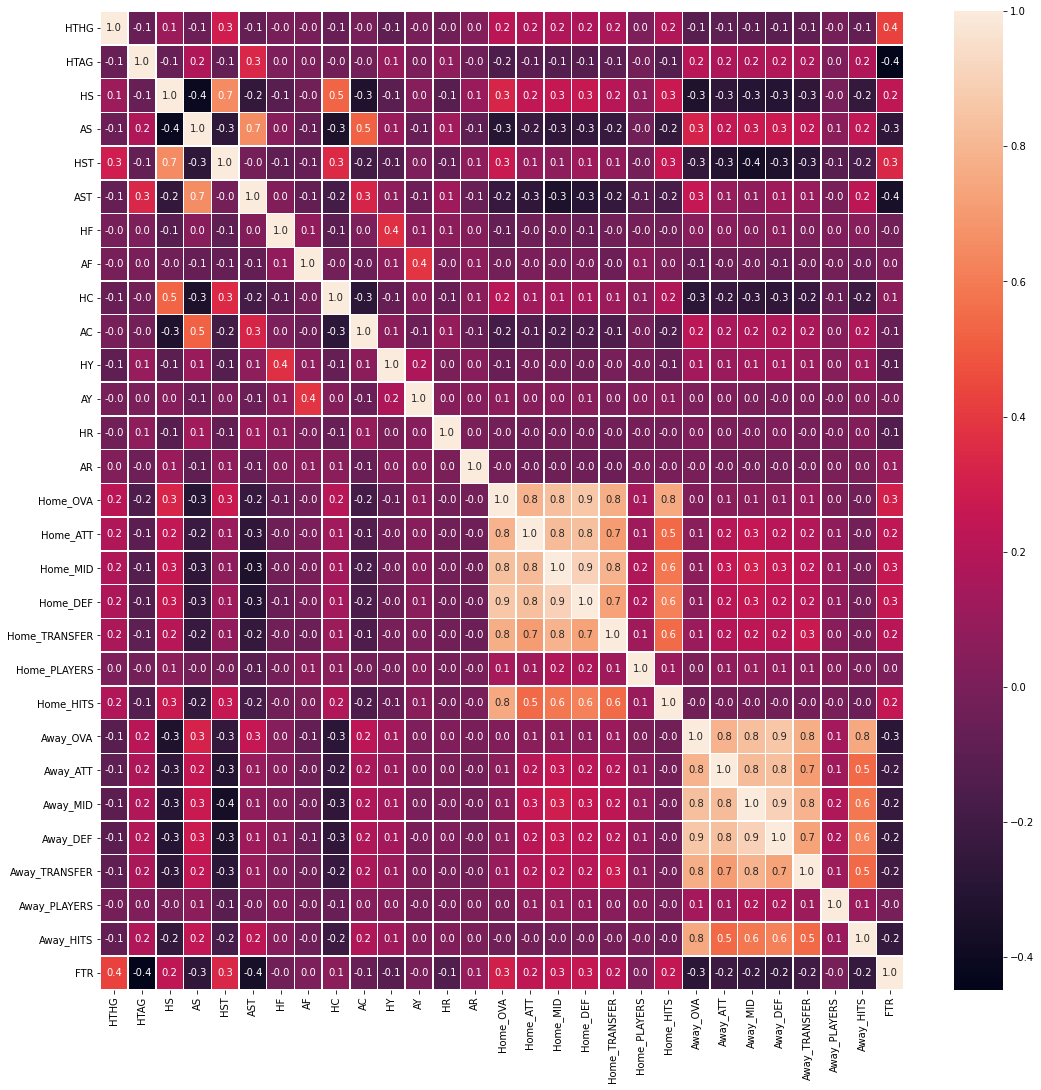

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Count Plot

In [ ]:
y.value_counts()

2    1582
0    1068
1     838
Name: FTR, dtype: int64

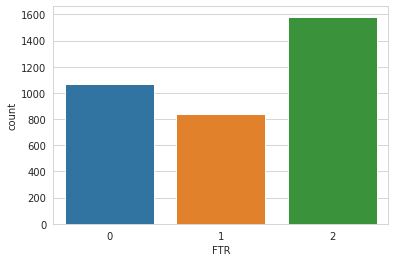

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='FTR', data=df)

In [ ]:
#scatterplot
sns.set()
sns.pairplot(reduced_df, size = 2.5)
plt.show();

#Logistic Regression



In [ ]:
#MINMAX SCALAR_CHI2_10_Features
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy
# 0.65

0.6504297994269341

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
# model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# from sklearn import metrics
# accuracy = metrics.accuracy_score(y_test, y_pred)
# accuracy

0.6532951289398281

In [ ]:
#GRID_SEARCH ON LR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=2000)
grid={"C":[0.1,0.01,0.001], "penalty":["l1","l2"], "solver":['lbfgs','newton-cg','sagsaga'],"multi_class":['multinomial']}
LR_CV = GridSearchCV(LR, param_grid=grid, n_jobs=-1, verbose=3, cv = 5)
LR_CV.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=2000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'sagsaga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
y_pred = LR_CV.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Accuracy:  0.6547277936962751
              precision    recall  f1-score   support

           0       0.67      0.77      0.71       223
           1       0.38      0.03      0.06       156
           2       0.66      0.88      0.75       319

    accuracy                           0.65       698
   macro avg       0.57      0.56      0.51       698
weighted avg       0.60      0.65      0.58       698

Confusion Matrix: [[171   4  48]
 [ 52   5  99]
 [ 34   4 281]]


In [ ]:
LR_CV.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
#Multinomial NB

#Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
nb_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred))
print(confusion_matrix(y_test,nb_pred))

0.6346704871060171
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       223
           1       0.39      0.38      0.39       156
           2       0.73      0.71      0.72       319

    accuracy                           0.63       698
   macro avg       0.60      0.60      0.60       698
weighted avg       0.63      0.63      0.63       698

[[157  36  30]
 [ 42  60  54]
 [ 36  57 226]]


In [ ]:
#With GridSearch
from sklearn.model_selection import GridSearchCV
NB = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(NB,parameters,cv=5,verbose=5,scoring='accuracy')
gs_NB.fit(X_train,y_train)
gsnb_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,gsnb_pred))
print(classification_report(y_test,gsnb_pred))
print(confusion_matrix(y_test,gsnb_pred))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.595, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.611, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.613, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.620, total=   0.0s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.602, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.604, total=   0.0s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ................... var_smoothing=0.1, score=0.659, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.606, total=   0.0s
[CV] var_smoothing=0.1 ...............................................
[CV] ................... var_smoothing=0.1, score=0.625, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.611, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.615, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.654, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] ... var_smoothing=0.08111308307896872, score=0.604, total=   0.0s
[CV] var_smoothing=0.08111308307896872 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished


#SVC

In [ ]:
 # "Support vector classifier"
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy
# 0.6504297994269341

0.6575931232091691

In [ ]:
#Using GSCV on SVC
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# parameters = {'max_leaf_nodes': list(range(2, 100)),
#           'min_samples_split': [2, 3, 4]}
svc = SVC(kernel = 'linear', C = 1,decision_function_shape='ovo')
model = GridSearchCV(svc, parameters, cv=5, scoring = 'accuracy', verbose=50, n_jobs=-1)
model.fit(X_train,y_train)
model.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    

{'C': 1, 'kernel': 'linear'}

In [ ]:
svc_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,svc_pred))
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

0.6575931232091691
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       223
           1       0.40      0.25      0.31       156
           2       0.71      0.81      0.76       319

    accuracy                           0.66       698
   macro avg       0.60      0.59      0.59       698
weighted avg       0.63      0.66      0.64       698

[[161  29  33]
 [ 44  39  73]
 [ 30  30 259]]


#KNN

In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

0.5859598853868195
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       223
           1       0.30      0.28      0.29       156
           2       0.69      0.66      0.68       319

    accuracy                           0.59       698
   macro avg       0.54      0.54      0.54       698
weighted avg       0.58      0.59      0.58       698

[[155  35  33]
 [ 51  43  62]
 [ 44  64 211]]


In [ ]:
#Decision Tree

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
dt_pred = model.predict(X_test)
feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
HTHG,0.482408
HTAG,0.430439
HST,0.043762
AS,0.043391
Home_HITS,0.000000
Away_HITS,0.000000
Home_TRANSFER,0.000000
Away_TRANSFER,0.000000
AST,0.000000
HS,0.000000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
print("Confusion Matrix:",confusion_matrix(y_test,dt_pred))

Accuracy:  0.6117478510028653
              precision    recall  f1-score   support

           0       0.53      0.82      0.65       223
           1       0.00      0.00      0.00       156
           2       0.69      0.77      0.72       319

    accuracy                           0.61       698
   macro avg       0.41      0.53      0.46       698
weighted avg       0.48      0.61      0.54       698

Confusion Matrix: [[182   0  41]
 [ 85   0  71]
 [ 74   0 245]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#GS
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['entropy','gini'], 
            'min_samples_split' : range(10,500,20),
            'max_depth': range(1,20,2)}

# parameters = {'max_leaf_nodes': list(range(2, 100)),
#           'min_samples_split': [2, 3, 4]}
dt = DecisionTreeClassifier()  
model = GridSearchCV(dt, parameters, cv=5, scoring = 'accuracy', verbose=50, n_jobs=-1)
model.fit(X_train,y_train)
model.best_params_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0450s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0269s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0372s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 150}

In [ ]:
gsdt_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,gsdt_pred))
print(classification_report(y_test,gsdt_pred))
print("Confusion Matrix:",confusion_matrix(y_test,gsdt_pred))

Accuracy:  0.6103151862464183
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       223
           1       0.28      0.15      0.20       156
           2       0.69      0.80      0.74       319

    accuracy                           0.61       698
   macro avg       0.53      0.54      0.52       698
weighted avg       0.57      0.61      0.58       698

Confusion Matrix: [[146  40  37]
 [ 52  24  80]
 [ 42  21 256]]


# RFC

In [ ]:
X

In [ ]:
#RandomClassifer_1
from sklearn.ensemble import RandomForestClassifier
rfnew = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfnew.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfnew_pred = rfnew.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,rfnew_pred))
print(classification_report(y_test,rfnew_pred))
print("Confusion Matrix:",confusion_matrix(y_test,rfnew_pred))

Accuracy:  0.6561604584527221
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       223
           1       0.40      0.22      0.28       156
           2       0.71      0.82      0.76       319

    accuracy                           0.66       698
   macro avg       0.59      0.59      0.58       698
weighted avg       0.63      0.66      0.63       698

Confusion Matrix: [[161  28  34]
 [ 47  34  75]
 [ 34  22 263]]


In [ ]:
#Random Forest Classifier_2
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,criterion='entropy',max_depth=50,bootstrap=True, n_estimators=10000)  

rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
# {'criterion': 'entropy',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 500}
rf_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,rf_pred))

print(classification_report(y_test,rf_pred))
print("Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Accuracy:  0.6404011461318052
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       223
           1       0.38      0.26      0.31       156
           2       0.71      0.79      0.75       319

    accuracy                           0.64       698
   macro avg       0.58      0.58      0.58       698
weighted avg       0.62      0.64      0.63       698

Confusion Matrix: [[154  33  36]
 [ 49  41  66]
 [ 34  33 252]]


In [ ]:
#F_CLASSIF_10FEATURES_MINMAX
#With Grid Search
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [1000,500],
    'max_depth' : [8,20,35,50],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,10]
}

rf = RandomForestClassifier(max_features='auto',criterion='entropy')
model = GridSearchCV(rf, parameters, cv=5, scoring = 'accuracy', verbose=5, n_jobs=-1)
model.fit(X_train,y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

In [ ]:
model.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
rf_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,rf_pred))

print(classification_report(y_test,rf_pred))
print("Confusion Matrix:",confusion_matrix(y_test,rf_pred))

Accuracy:  0.664756446991404
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       223
           1       0.45      0.24      0.32       156
           2       0.71      0.82      0.76       319

    accuracy                           0.66       698
   macro avg       0.61      0.60      0.59       698
weighted avg       0.64      0.66      0.64       698

Confusion Matrix: [[164  24  35]
 [ 46  38  72]
 [ 35  22 262]]


In [ ]:
# #MINMAX
# #Random Forest Classifier with Grid Search
# #GS
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier


# parameters = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }



# rf = RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=500)
# # model = GridSearchCV(rf, parameters, cv=5, scoring = 'accuracy', verbose=50, n_jobs=-1)
# rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# rfgs_pred = rf.predict(X_test)


In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
# print("Accuracy: ",accuracy_score(y_test,rfgs_pred))
# print(classification_report(y_test,rfgs_pred))
# print("Confusion Matrix:",confusion_matrix(y_test,rfgs_pred))

Accuracy:  0.6547277936962751
              precision    recall  f1-score   support

           0       0.67      0.74      0.71       223
           1       0.41      0.23      0.30       156
           2       0.70      0.80      0.75       319

    accuracy                           0.65       698
   macro avg       0.59      0.59      0.58       698
weighted avg       0.63      0.65      0.63       698

Confusion Matrix: [[166  21  36]
 [ 47  36  73]
 [ 33  31 255]]


In [ ]:
# # CROSS_VAL_SCORE
# from sklearn.model_selection import cross_val_score, KFold
# cv = KFold(len(y), 5, shuffle=True, random_state=0)
# scores_dt = cross_val_score(model_dt, X, y, cv=cv)

In [ ]:
# X.columns


Index(['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'Home_OVA', 'Home_ATT', 'Home_MID', 'Home_DEF',
       'Home_TRANSFER', 'Home_PLAYERS', 'Home_HITS', 'Away_OVA', 'Away_ATT',
       'Away_MID', 'Away_DEF', 'Away_TRANSFER', 'Away_PLAYERS', 'Away_HITS'],
      dtype='object')

In [ ]:
# # rf.feature_importances_
# # zip(X.columns, rf.feature_importances_)

# pd.DataFrame({'col_name': rf.feature_importances_}, index=X.columns).sort_values(by='col_name', ascending=False)

# MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd')
mlp.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
mlp_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))
print("Confusion Matrix:",confusion_matrix(y_test,mlp_pred))

Accuracy:  0.6461318051575932
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       223
           1       0.50      0.01      0.01       156
           2       0.64      0.87      0.74       319

    accuracy                           0.65       698
   macro avg       0.60      0.55      0.49       698
weighted avg       0.61      0.65      0.57       698

Confusion Matrix: [[172   0  51]
 [ 52   1 103]
 [ 40   1 278]]


In [ ]:
#Reduced Dataset

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd')
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,mlp_pred))
print(classification_report(y_test,mlp_pred))
print("Confusion Matrix:",confusion_matrix(y_test,mlp_pred))

Accuracy:  0.6432664756446992
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       223
           1       0.36      0.03      0.06       156
           2       0.65      0.86      0.74       319

    accuracy                           0.64       698
   macro avg       0.55      0.55      0.50       698
weighted avg       0.58      0.64      0.58       698

Confusion Matrix: [[171   3  49]
 [ 54   5  97]
 [ 40   6 273]]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#GS
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier(max_iter=1000)
parameters = {
    'hidden_layer_sizes': [(100,50,100),(100,)],
    'activation': ['tanh', 'relu','softmax'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

model = GridSearchCV(mlp_gs, parameters, n_jobs=-1, cv=5, verbose=5,scoring='accuracy')
model.fit(X_train, y_train)




Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
model.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100, 50, 100),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
mlpgs_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Accuracy: ",accuracy_score(y_test,mlpgs_pred))
print(classification_report(y_test,mlpgs_pred))
print("Confusion Matrix:",confusion_matrix(y_test,mlpgs_pred))

Accuracy:  0.6547277936962751
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       223
           1       0.37      0.19      0.25       156
           2       0.72      0.79      0.76       319

    accuracy                           0.65       698
   macro avg       0.58      0.59      0.57       698
weighted avg       0.62      0.65      0.63       698

Confusion Matrix: [[174  20  29]
 [ 59  30  67]
 [ 35  31 253]]


In [ ]:
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

In [ ]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression','GaussianNB','Support Vector Machine','K-Nearest Neighbors','Decision Tree','Random Forest','MLPClassifier'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Accuracy', ascending=False)

In [ ]:
b

Scraping


[<th class="col-avatar"></th>,
 <th class="col-name-wide text-left">Name</th>,
 <th class="tooltip col col-oa" data-tooltip="Overall"><a class="bp3-text-overflow-ellipsis pjax" href="/teams?col=oa&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>OVA	</a></th>,
 <th class="tooltip col col-at" data-tooltip="Attack"><a class="bp3-text-overflow-ellipsis pjax" href="/teams?col=at&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>ATT	</a></th>,
 <th class="tooltip col col-md" data-tooltip="Midfield"><a class="bp3-text-overflow-ellipsis pjax" href="/teams?col=md&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>MID	</a></th>,
 <th class="tooltip col col-df" data-tooltip="Defence"><a class="bp3-text-overflow-ellipsis pjax" href="/teams?col=df&amp;sort=desc" rel="nofollow"><span class="bp3-icon sorter"></span>DEF	</a></th>,
 <th class="tooltip col col-tb" data-tooltip="Transfer Budget"><a class="bp3-text-overflow-ellipsis pjax" href="/teams?co

bs4.element.ResultSet

{'': [], 'Name': [], 'OVA': [], 'ATT': [], 'MID': [], 'DEF': [], 'Transfer Budget': [], 'Players': [], 'Hits': []}
